In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from matplotlib.pyplot import tight_layout
from kneed import KneeLocator
import colorsys

def HSVToRGB(h, s, v): 
    (r, g, b) = colorsys.hsv_to_rgb(h, s, v) 
    return (r, g, b) 

def getDistinctColors(n): 
    huePartition = 1.0 / (n + 1) 
    return [HSVToRGB(huePartition * value, 1.0, 1.0) for value in range(0, n)]

colors = getDistinctColors(20)

# LOAD DATA
clustering_df = pd.read_csv("../data/clustering_RSA-0001-m2Jwd-P-QmyCz.csv", index_col=0)
clustering_df.info()
metadata_df = pd.read_csv("../data/clustering_metadata_la_fe.csv")
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 0JQDMK44FDMVKkU0GBgw to zdjn6E90MG6KaxXZDRLs
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   death                  395 non-null    float64
 1   hospitalization        395 non-null    float64
 2   eat_well               395 non-null    float64
 3   is_vomiting            395 non-null    float64
 4   sleep_well             395 non-null    float64
 5   ER_contact             395 non-null    float64
 6   medication_change      395 non-null    float64
 7   has_dyspnoea           395 non-null    float64
 8   has_pain               395 non-null    float64
 9   pain_med               395 non-null    float64
 10  urine_well             395 non-null    float64
 11  urine_pain             395 non-null    float64
 12  urine_blood            395 non-null    float64
 13  has_constipation       395 non-null    float64
 14  constipation_days      395 

In [2]:
# STANDARDIZE DATA
var_list = list(clustering_df.columns)
X = clustering_df.to_numpy()
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Knee point = 6.95587948857378
Mean = 3.3186348492232938
Median = 2.8621448290242557


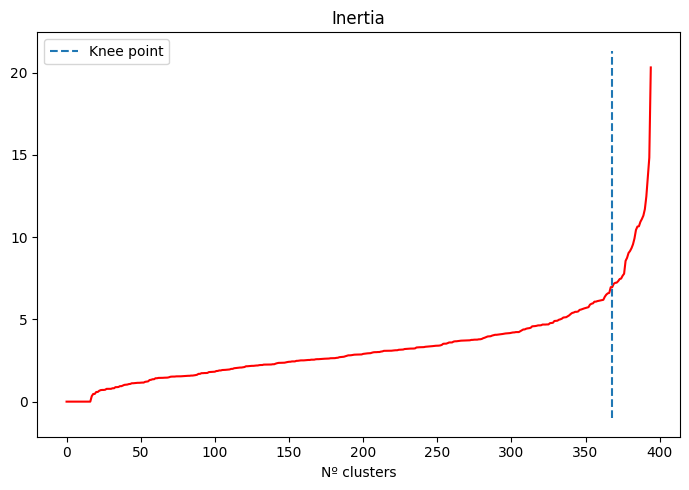

In [26]:
# VISUALIZE AVG. DISTANCES BETWEEN KNN
neighbors = NearestNeighbors(n_neighbors=70)
neighbors_fit = neighbors.fit(X_std)
distances, indices = neighbors_fit.kneighbors(X_std)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

kn = KneeLocator(np.arange(len(distances)), distances, curve='convex', direction='increasing')

fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True)
ax.plot(distances, color="red")
ax.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', label="Knee point")
ax.legend(loc=2)
ax.set_xlabel("Nº neighbors")
ax.set_title("Avg. distance between neighbors")
 
print(f"Knee point = {distances[kn.knee]}")
print(f"Mean = {distances.mean()}")
print(f"Median = {np.median(distances)}")

In [29]:
# TEST DBSCAN PARAMS.
for eps in np.linspace(5, 10, 15):
    for min_samples in range(30, 90, 5):
        model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = model.fit_predict(X_std)
        print(np.unique(labels, return_counts=True))

(array([-1,  0]), array([ 81, 314]))
(array([-1,  0]), array([ 93, 302]))
(array([-1,  0]), array([ 93, 302]))
(array([-1,  0]), array([ 96, 299]))
(array([-1,  0]), array([ 97, 298]))
(array([-1,  0]), array([ 99, 296]))
(array([-1,  0]), array([ 99, 296]))
(array([-1,  0]), array([100, 295]))
(array([-1,  0]), array([100, 295]))
(array([-1,  0]), array([100, 295]))
(array([-1,  0]), array([100, 295]))
(array([-1,  0]), array([100, 295]))
(array([-1,  0]), array([ 71, 324]))
(array([-1,  0]), array([ 71, 324]))
(array([-1,  0]), array([ 71, 324]))
(array([-1,  0]), array([ 71, 324]))
(array([-1,  0]), array([ 79, 316]))
(array([-1,  0]), array([ 80, 315]))
(array([-1,  0]), array([ 81, 314]))
(array([-1,  0]), array([ 81, 314]))
(array([-1,  0]), array([ 81, 314]))
(array([-1,  0]), array([ 82, 313]))
(array([-1,  0]), array([ 82, 313]))
(array([-1,  0]), array([ 83, 312]))
(array([-1,  0]), array([ 60, 335]))
(array([-1,  0]), array([ 61, 334]))
(array([-1,  0]), array([ 62, 333]))
(